In [ ]:
import datetime
# define required etf for Nasdaq100(QQQ) and S&P500(SPY)
#symbols = ["TQQQ","TMF","SCO","SQQQ","NUGT","SPXU","SPXS","SDOW","TZA","SOXS","SRTY","FAZ","YANG","TECS","FNGD","LABD","EDZ","ERY","TYD","DRV","SMDD"]
symbols = ["QQQ","TLT","BRK-B"]
#symbols = ["QQQ","AAPL","TSLA"]
start = '2021-12-01' # download data from start date
#end = '2016-03-01' #datetime.now()
end = datetime.datetime.now()

In [ ]:
# yahoo finance data, create directory for data
#! pip install pandas_datareader > /dev/null 2>&1
!pip install --upgrade pandas-datareader

In [ ]:
# import yahoo finance and reuqired library to write data
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [ ]:
symbols_var = []
for symbol in symbols:
    globals()[symbol] = DataReader(symbol, 'yahoo', start=start, end=end)
    globals()[symbol]['name'] = symbol
    symbols_var.append(globals()[symbol])

In [ ]:
symbols_var[0].describe()

,High,Low,Open,Close,Volume,Adj Close
count,91.000000,91.000000,91.000000,91.000000,9.100000e+01,91.000000
mean,368.471650,360.065270,364.713295,364.408241,7.346766e+07,363.964911
std,21.926737,23.189584,22.880028,22.634896,2.745727e+07,22.502872
min,326.589996,317.450012,318.839996,318.170013,1.685821e+07,317.777161
25%,351.529999,341.434998,346.580002,346.929993,5.780570e+07,346.501617
50%,363.649994,356.540009,359.519989,361.100006,7.081430e+07,361.100006
75%,389.500000,380.165009,384.924988,385.365005,8.350400e+07,384.587723
max,404.579987,400.709991,404.399994,403.480011,1.986858e+08,402.981812


In [ ]:
symbols_var[1].describe()

,High,Low,Open,Close,Volume,Adj Close
count,91.000000,91.000000,91.000000,91.000000,9.100000e+01,91.000000
mean,140.883187,139.262197,140.136154,140.044286,2.093195e+07,139.603657
std,7.337583,7.348147,7.373598,7.321124,7.590440e+06,7.100668
min,124.190002,123.499901,123.919998,123.830002,5.690547e+06,123.830002
25%,135.644997,134.360001,135.215004,134.945000,1.628970e+07,134.649490
50%,141.309998,140.000000,140.360001,140.240005,1.933060e+07,139.904755
75%,145.680000,143.654999,145.355003,144.290001,2.475490e+07,143.678703
max,155.119995,151.929993,154.050003,154.350006,5.589170e+07,153.523102


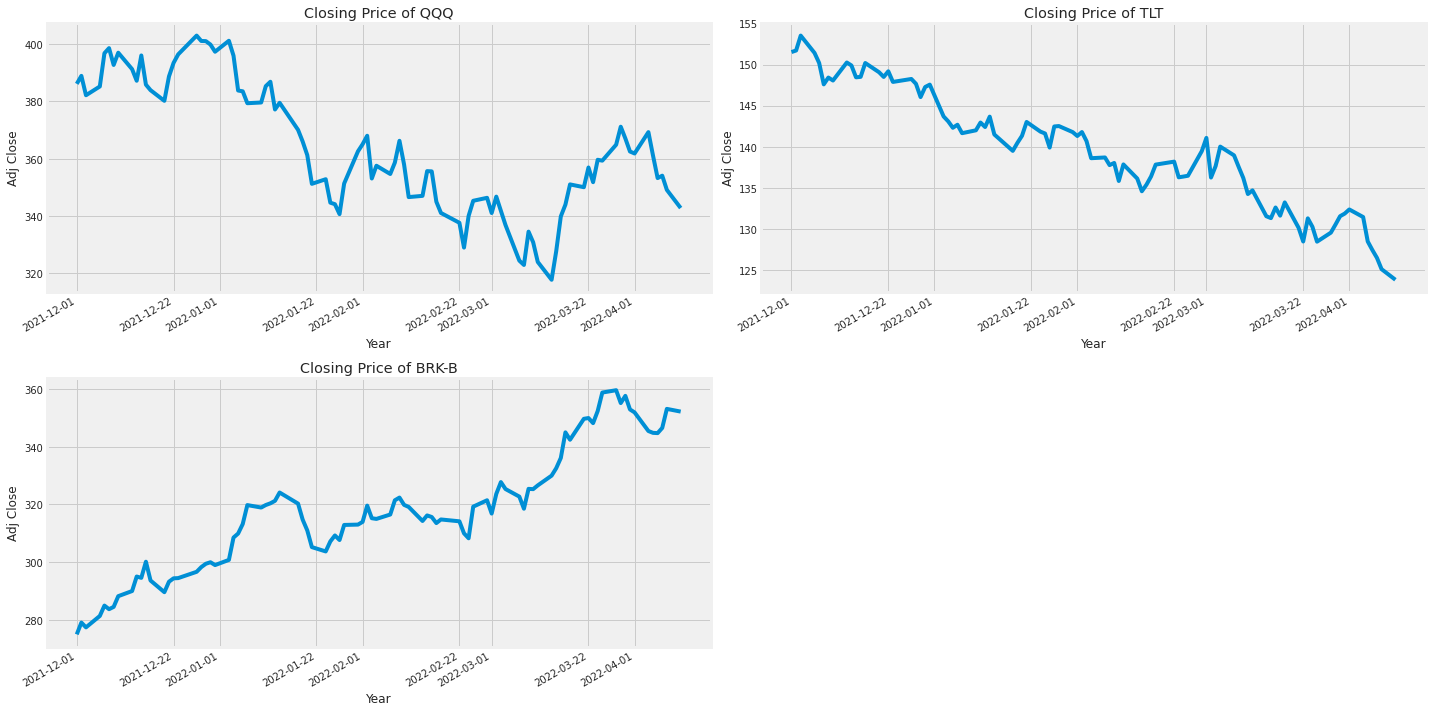

In [ ]:
import math
plt.figure(figsize=(20, 10))

for i, symbol in enumerate(symbols_var, 1):
    if (i-1) < len(symbols):
        plt.subplot(math.ceil(len(symbols)/2), 2, i)
        symbol['Adj Close'].plot()
        plt.ylabel('Adj Close')
        plt.xlabel('Year')
        plt.title(f"Closing Price of {symbols[i - 1]}")
    
plt.tight_layout()

In [ ]:
ma_list = [10, 30, 50, 120, 200]

for ma in ma_list:
    for symbol in symbols_var:
        symbol_ma = f"MA {ma}"
        symbol[symbol_ma] = symbol['Adj Close'].rolling(ma).mean()

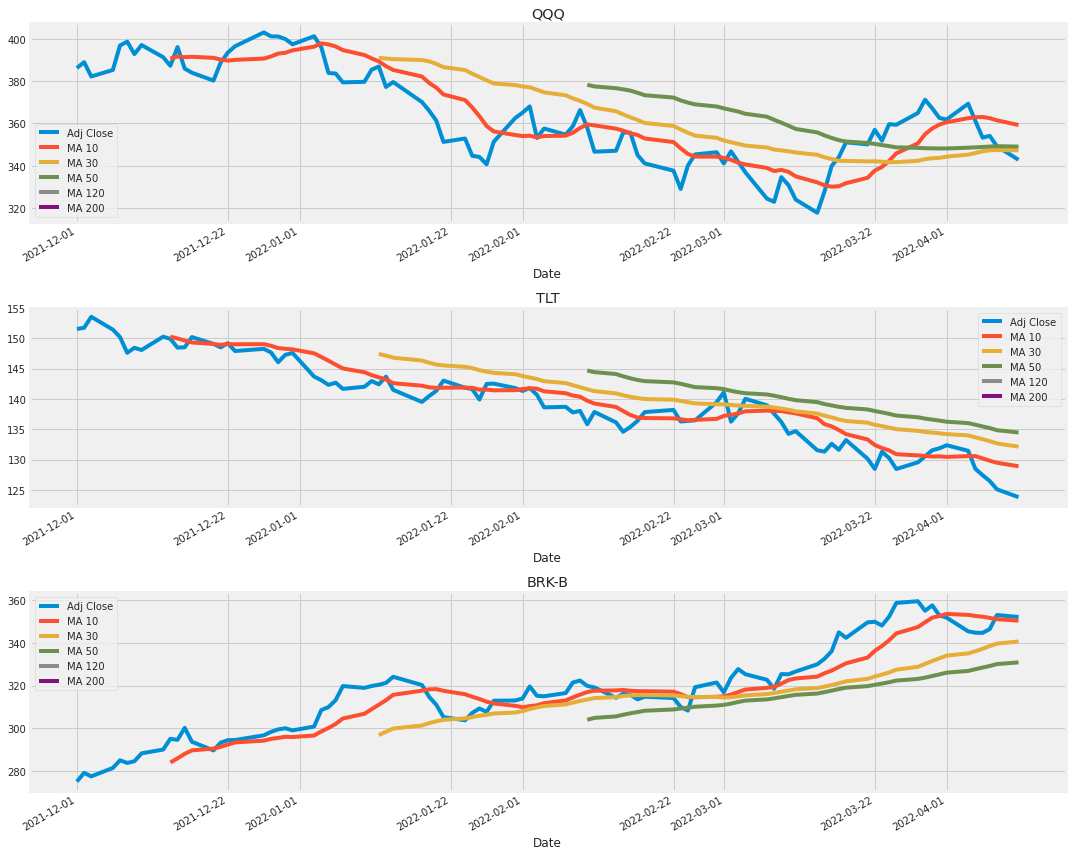

In [ ]:
cols = 2
fig, axes = plt.subplots(nrows=len(symbols_var))
fig.set_figheight(12)
fig.set_figwidth(15)

plot_data = ['Adj Close']
for ma in ma_list:
    plot_data.append(f'MA {ma}')

for i,symbol in enumerate(symbols_var):
    symbol[['Adj Close', 'MA 10', 'MA 30', 'MA 50', 'MA 120', 'MA 200']].plot(ax=axes[i])
    axes[i].set_title(symbol['name'][1])


fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

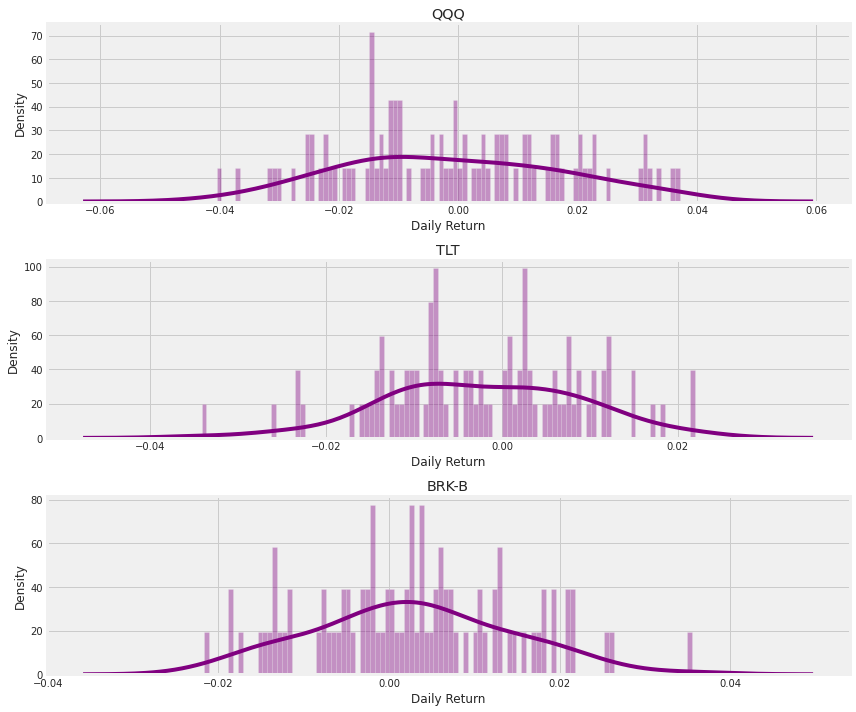

In [ ]:
for company in symbols_var:
    company['Daily Return'] = company['Adj Close'].pct_change()
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
fig, axes = plt.subplots(nrows=len(symbols_var))
fig.set_figheight(10)
fig.set_figwidth(12)

for i, company in enumerate(symbols_var):
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple', ax=axes[i])
    #plt.ylabel('Daily Return')
    axes[i].set_title(company['name'][0])
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

In [ ]:
QQQ

,High,Low,Open,Close,Volume,Adj Close,name,MA 10,MA 30,MA 50,MA 120,MA 200,Daily Return
Date,,,,,,,,,,,,,
2021-12-01,400.480011,386.640015,398.279999,387.119995,77766500.0,386.148804,QQQ,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02,391.739990,384.339996,385.799988,389.910004,84416600.0,388.931793,QQQ,NaN,NaN,NaN,NaN,NaN,0.007207
2021-12-03,392.339996,378.899994,391.309998,383.130005,105349100.0,382.168793,QQQ,NaN,NaN,NaN,NaN,NaN,-0.017389
2021-12-06,387.600006,379.299988,383.630005,386.200012,67588800.0,385.231110,QQQ,NaN,NaN,NaN,NaN,NaN,0.008013
2021-12-07,398.459991,392.989990,393.029999,397.829987,56005300.0,396.831909,QQQ,NaN,NaN,NaN,NaN,NaN,0.030114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-05,368.540009,359.929993,367.809998,361.100006,62738700.0,361.100006,QQQ,362.881000,346.018895,348.684330,NaN,NaN,-0.022204
2022-04-06,356.779999,350.559998,355.649994,353.260010,90077100.0,353.260010,QQQ,363.024002,346.827121,348.855853,NaN,NaN,-0.021711
2022-04-07,356.350006,348.690002,352.239990,354.100006,63777400.0,354.100006,QQQ,362.469003,347.294803,349.054963,NaN,NaN,0.002378


In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(symbols, 'yahoo', start=start,end=end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,QQQ,TLT,BRK-B
Date,,,
2021-12-01,386.148804,151.523819,275.000000
2021-12-02,388.931793,151.712814,279.089996
2021-12-03,382.168793,153.523087,277.429993
2021-12-06,385.231110,151.414429,281.380005
2021-12-07,396.831909,150.191010,284.970001


In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,QQQ,TLT,BRK-B
Date,,,
2021-12-01,NaN,NaN,NaN
2021-12-02,0.007207,0.001247,0.014873
2021-12-03,-0.017389,0.011932,-0.005948
2021-12-06,0.008013,-0.013735,0.014238
2021-12-07,0.030114,-0.008080,0.012759


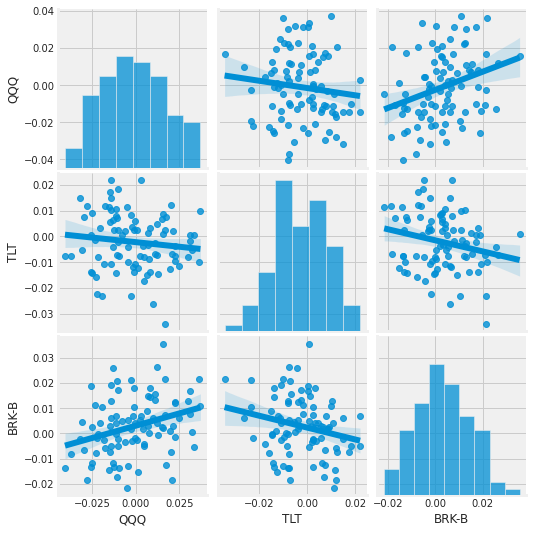

In [ ]:
sns.pairplot(tech_rets, kind='reg')

In [ ]:
#tech_rets.corr()["TQQQ"].where(lambda x: x>-0.5).dropna()

In [ ]:
#tech_rets.corr()["TQQQ"].where(lambda x: x<0).dropna()

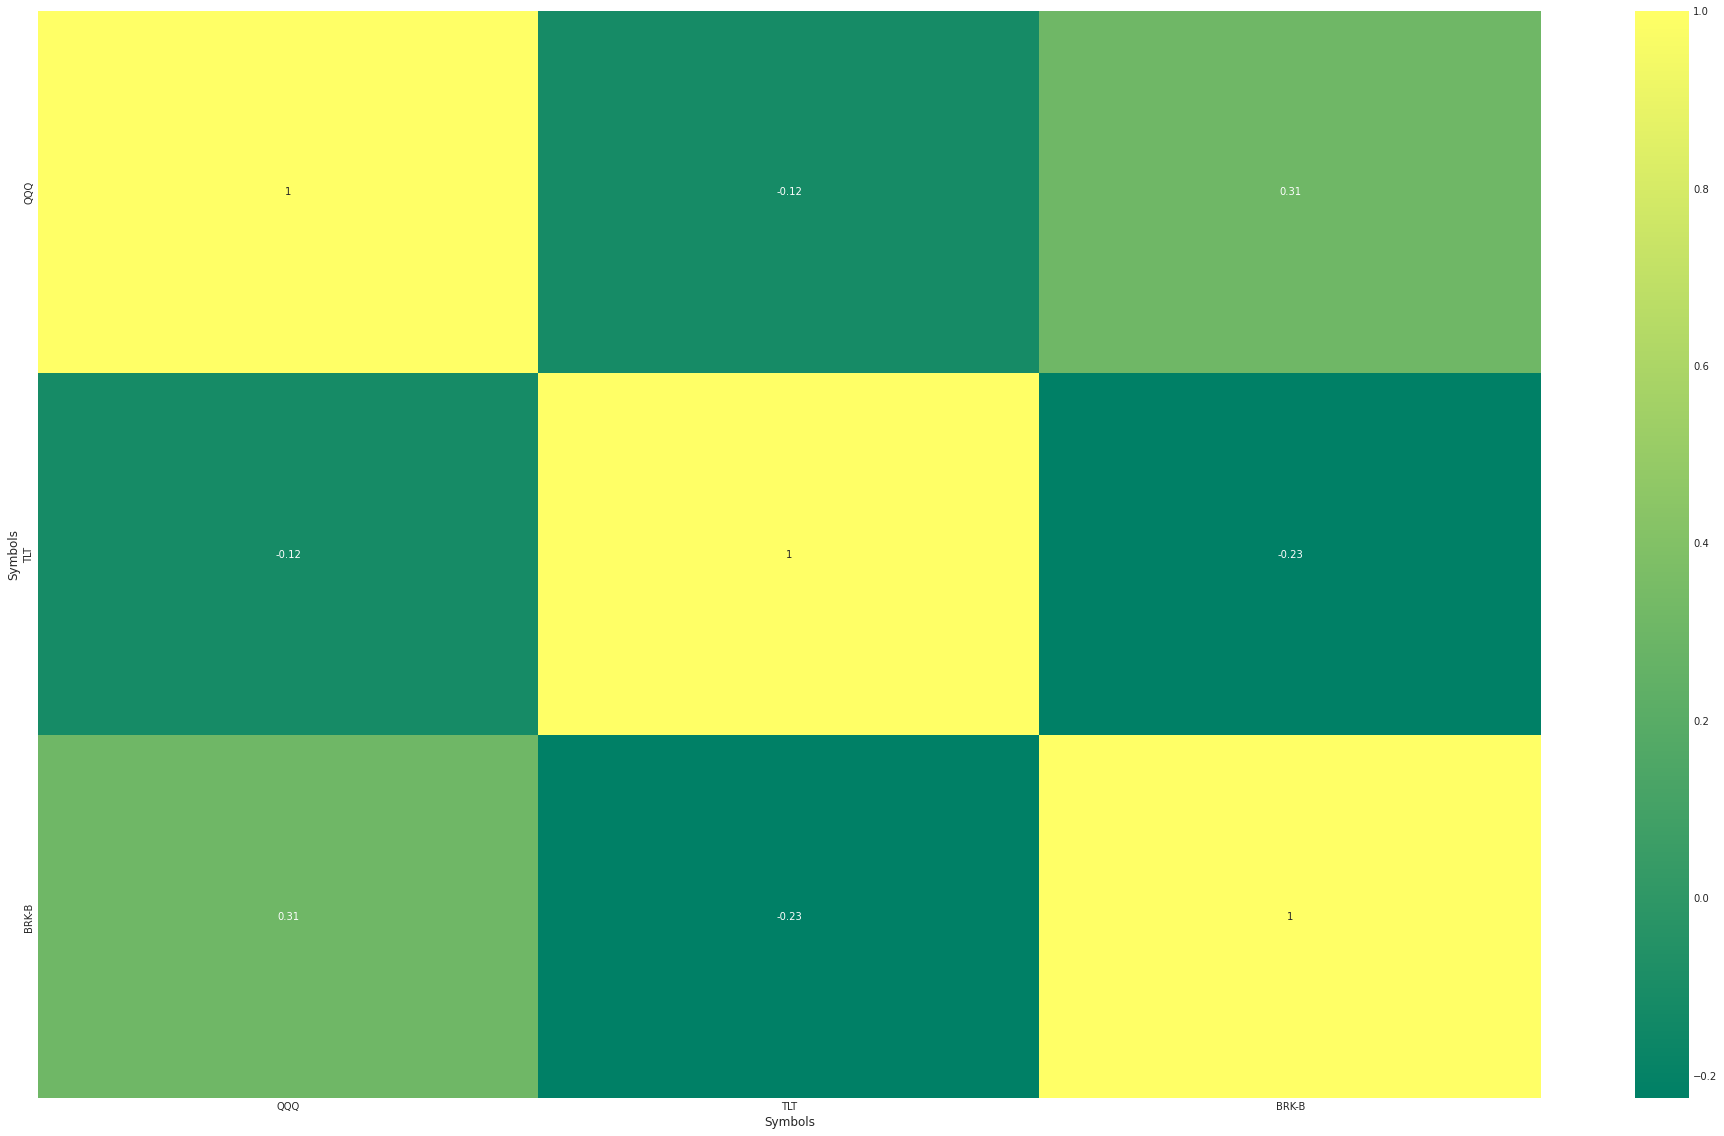

In [ ]:
plt.figure(figsize=(30, 20))
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

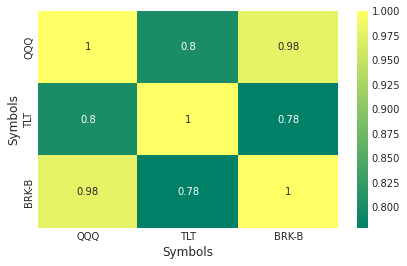

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

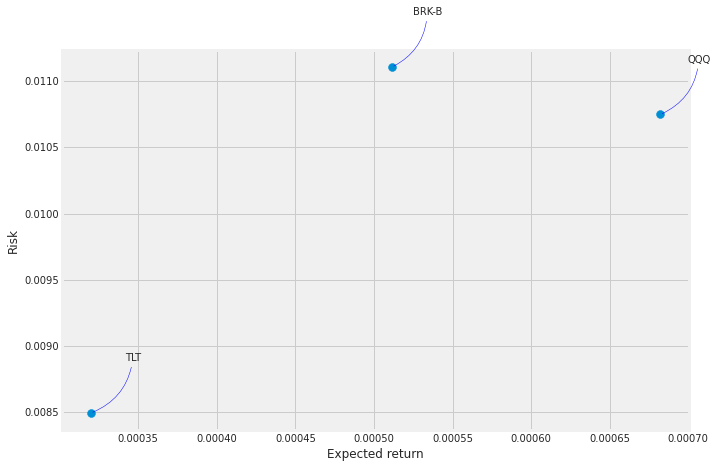

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
# Get the stock quote
df = DataReader('QQQ', data_source='yahoo', start=start)
# Show teh data
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-04,369.309998,362.440002,362.709991,369.299988,45950200.0,369.299988
2022-04-05,368.540009,359.929993,367.809998,361.100006,62738700.0,361.100006
2022-04-06,356.779999,350.559998,355.649994,353.260010,90077100.0,353.260010
2022-04-07,356.350006,348.690002,352.239990,354.100006,63580900.0,354.100006
2022-04-08,352.540009,350.390015,352.239990,350.459991,4619912.0,350.459991


In [ ]:
df = df[:-1]

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-27,54.860001,54.209999,54.580002,54.770000,29263700.0,49.206036
2010-12-28,54.919998,54.549999,54.880001,54.669998,24160500.0,49.116173
2010-12-29,54.900002,54.730000,54.820000,54.790001,24132700.0,49.223995
2010-12-30,54.799999,54.549999,54.790001,54.660000,27553300.0,49.107193
2010-12-31,54.619999,54.209999,54.590000,54.459999,38540100.0,48.927502
...,...,...,...,...,...,...
2022-04-01,363.609985,358.589996,362.809998,361.850006,54503500.0,361.850006
2022-04-04,369.309998,362.440002,362.709991,369.299988,45950200.0,369.299988
2022-04-05,368.540009,359.929993,367.809998,361.100006,62738700.0,361.100006


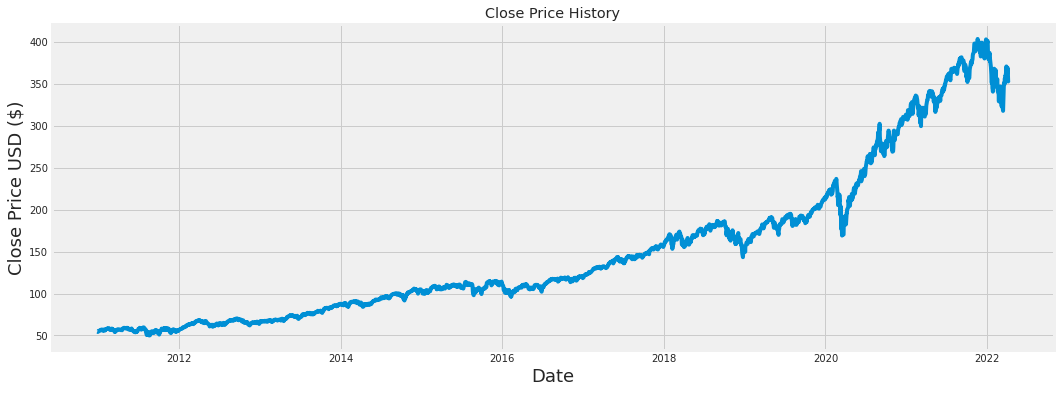

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2699

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data.shape

(2841, 1)

In [ ]:
future_days = 1

In [ ]:
# Create the training data set 
# Create the scaled training data set
#train_data = scaled_data[0:int(training_data_len), :]
train_data = scaled_data[0:training_data_len,:]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(future_days, len(train_data)): # use 0 to nth-1 day to predict nth day
    x_train.append(train_data[i-future_days:i, 0])
    y_train.append(train_data[i, 0])
    #if i<= 61:
    #    print(x_train)
    #    print(y_train)
    #    print()

#for i in range(len(train_data)-future_days-1): # use 0 to 1 day to predict next day
#  x_train.append(train_data[i:(i+future_days), 0])
#  y_train.append(train_data[i + future_days, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))
x_train.shape , y_train.shape

((2698, 1), (2698,))

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - future_days: , :]
#test_data = scaled_data[training_data_len:len(scaled_data),:]
# Create the data sets x_test and y_test
x_test = []
y_test = []
#y_test = dataset[training_data_len:, :]
for i in range(future_days, len(test_data)):
    x_test.append(test_data[i-future_days:i, 0])
    y_test.append(test_data[i, 0])
#for i in range(len(test_data)-future_days-1):
#  x_test.append(test_data[i:(i+future_days), 0])
#  y_test.append(test_data[i + future_days, 0])
    
# Convert the data to a numpy array
x_test, y_test = np.array(x_test), np.array(y_test)

real_y_test = scaler.inverse_transform(np.reshape(y_test, (-1, 1))) # rmse is computed post on INVERSESCALED target and these are the real performance.

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))
x_test.shape

(142, 1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
dt = DecisionTreeRegressor().fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_pred = np.reshape(dt_pred, (-1, 1)) # -1 = everything in tree_pred, 1 = to which number
dt_pred = scaler.inverse_transform(dt_pred) # rmse is computed post on INVERSESCALED target and these are the real performance.
dt_rmse = mean_squared_error(real_y_test, dt_pred, squared=False)
dt_rmse

9.870749801884461

In [ ]:
rf = RandomForestRegressor().fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_pred = np.reshape(rf_pred, (-1,1))
rf_pred = scaler.inverse_transform(rf_pred)
rf_rmse = mean_squared_error(real_y_test, rf_pred, squared=False)
rf_rmse

9.707725635518623

In [ ]:
lr = LinearRegression().fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_pred = np.reshape(lr_pred, (-1,1))
lr_pred = scaler.inverse_transform(lr_pred)
lr_rmse = mean_squared_error(real_y_test, lr_pred, squared=False)
lr_rmse

5.740423293066563

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.15))
model.add(LSTM(64, return_sequences=False))
#model.add(Dense(64, activation ='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') # val_loss and loss are computed during training on SCALED target. 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

In [ ]:
# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test,y_test),callbacks=[reduce_lr_loss, earlystopping])

Epoch 1/100
43/43 [==============================] - 7s 35ms/step - loss: 0.0563 - val_loss: 0.0977 - lr: 0.0010
Epoch 2/100
43/43 [==============================] - 0s 8ms/step - loss: 0.0117 - val_loss: 5.9678e-04 - lr: 0.0010
Epoch 3/100
43/43 [==============================] - 0s 9ms/step - loss: 6.7000e-04 - val_loss: 0.0034 - lr: 0.0010
Epoch 4/100
43/43 [==============================] - 0s 11ms/step - loss: 4.8552e-04 - val_loss: 0.0031 - lr: 0.0010
Epoch 5/100
43/43 [==============================] - 0s 11ms/step - loss: 4.2098e-04 - val_loss: 0.0017 - lr: 0.0010
Epoch 6/100
43/43 [==============================] - 0s 9ms/step - loss: 3.6998e-04 - val_loss: 0.0012 - lr: 0.0010
Epoch 7/100
43/43 [==============================] - 0s 10ms/step - loss: 3.5807e-04 - val_loss: 0.0012 - lr: 0.0010
Epoch 8/100
43/43 [==============================] - 0s 9ms/step - loss: 2.9058e-04 - val_loss: 0.0010 - lr: 0.0010
Epoch 9/100
38/43 [=========================>....] - ETA: 0s - loss: 2.5

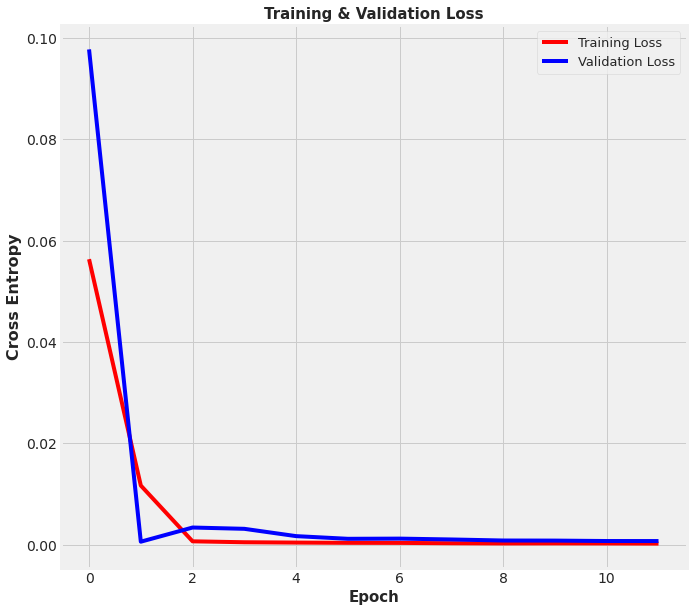

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
# plot loss during training
plt.figure(figsize=(10, 10))
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()

In [ ]:
# Get the models predicted price values 
lstm_pred = model.predict(x_test)
lstm_pred = scaler.inverse_transform(lstm_pred)

# Get the root mean squared error (RMSE)
lstm_rmse = mean_squared_error(real_y_test, lstm_pred, squared=False)
lstm_rmse

8.646902274348998

In [ ]:
# Two bidirectional LSTM layers
# Note that if you want to connect one LSTM to another, you have to pass return_sequences=True
# Build the LSTM model
biLSTM = Sequential()
biLSTM.add(Bidirectional(LSTM(64, return_sequences=True), input_shape= (x_train.shape[1], 1)))
#biLSTM.add(Dropout(0.15))
biLSTM.add(Bidirectional(LSTM(32, return_sequences=False)))
biLSTM.add(Dense(64, activation ='relu'))
biLSTM.add(Dense(1, activation='tanh'))
biLSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 128)           33792     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 79,233
Trainable params: 79,233
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
biLSTM.compile(optimizer='adam', loss='mean_squared_error') # val_loss and loss are computed during training on SCALED target. 

In [ ]:
# Train the model
history_biLSTM = biLSTM.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test,y_test),callbacks=[reduce_lr_loss, earlystopping])

Epoch 1/100
43/43 [==============================] - 12s 53ms/step - loss: 0.0557 - val_loss: 0.1265 - lr: 0.0010
Epoch 2/100
43/43 [==============================] - 0s 10ms/step - loss: 0.0084 - val_loss: 0.0052 - lr: 0.0010
Epoch 3/100
43/43 [==============================] - 0s 9ms/step - loss: 2.9147e-04 - val_loss: 0.0062 - lr: 0.0010
Epoch 4/100
43/43 [==============================] - 0s 8ms/step - loss: 1.8752e-04 - val_loss: 0.0059 - lr: 0.0010
Epoch 5/100
43/43 [==============================] - 0s 8ms/step - loss: 1.6369e-04 - val_loss: 0.0048 - lr: 0.0010
Epoch 6/100
43/43 [==============================] - 0s 9ms/step - loss: 1.5173e-04 - val_loss: 0.0045 - lr: 0.0010
Epoch 7/100
43/43 [==============================] - 0s 10ms/step - loss: 1.4181e-04 - val_loss: 0.0042 - lr: 0.0010
Epoch 8/100
43/43 [==============================] - 0s 10ms/step - loss: 1.2732e-04 - val_loss: 0.0039 - lr: 0.0010
Epoch 9/100
43/43 [==============================] - 1s 12ms/step - loss: 1

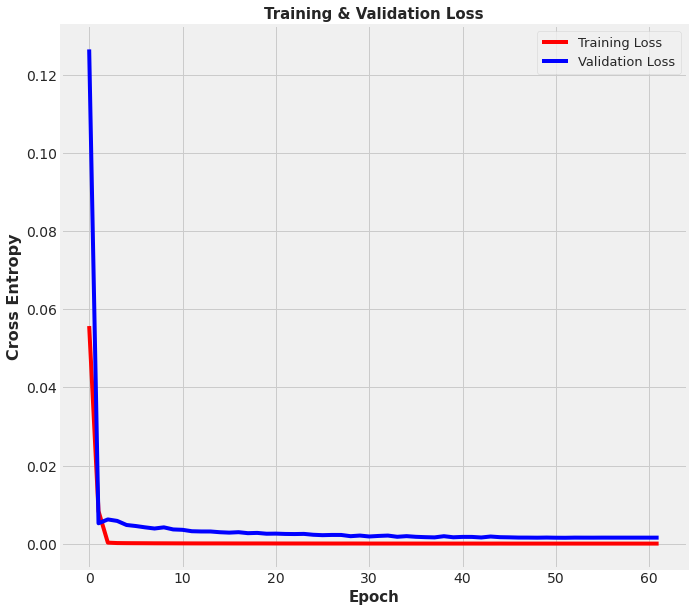

In [ ]:
loss = history_biLSTM.history['loss']
val_loss = history_biLSTM.history['val_loss']
# plot loss during training
plt.figure(figsize=(10, 10))
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()

In [ ]:
# Get the models predicted price values 
bilstm_pred = biLSTM.predict(x_test)
bilstm_pred = scaler.inverse_transform(bilstm_pred)

# Get the root mean squared error (RMSE)
bilstm_rmse = mean_squared_error(real_y_test, bilstm_pred, squared=False)
bilstm_rmse

13.891016690824324

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

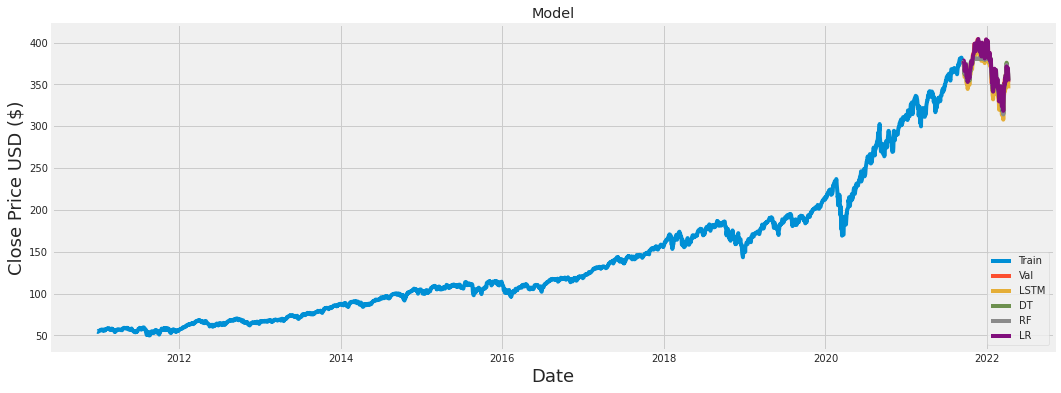

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
#train = data[0:training_data_len]
#valid = data[training_data_len:len(scaled_data)-2]

valid['BILSTM_Predictions'] = bilstm_pred
valid['LSTM_Predictions'] = lstm_pred
valid['DT_Predictions'] = dt_pred
valid['RF_Predictions'] = rf_pred
valid['LR_Predictions'] = lr_pred
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'LSTM_Predictions','DT_Predictions','RF_Predictions','LR_Predictions']])
plt.legend(['Train', 'Val', 'LSTM','DT','RF','LR'], loc='lower right')
plt.show()

In [ ]:
valid.tail()

,Close,BILSTM_Predictions,LSTM_Predictions,DT_Predictions,RF_Predictions,LR_Predictions
Date,,,,,,
2022-04-01,361.850006,356.907898,355.443237,362.745010,362.876261,362.908989
2022-04-04,369.299988,356.459991,354.686920,363.950012,363.738206,362.218215
2022-04-05,361.100006,361.132568,362.882599,365.730011,366.541104,369.676523
2022-04-06,353.260010,355.969635,353.865509,362.420013,361.494807,361.467377
2022-04-07,354.100006,350.621338,345.319336,354.989990,355.291296,353.618618
